<a href="https://colab.research.google.com/github/christiantommasi/MeuPortf-lioEmPythonER/blob/main/Energia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Objetivos com o projeto de consumo de Energia

1. Após conclusão do projeto, vou criar duas variáveis que armazenam os valores de data e previsão (que se refere à previsão de consumo de energia) para armazenar os dados e plotar visualmente para comparação.

2. Com esse projeto, pretendo adiquir futuros dados de consumo de energia, levando assim, à um cálculo de quanto será consumido em Wh por um período X de dias, semanas ou meses, podendo se preparar e planejar qual seria o consumo em energia e o gasto que isso traria ao bolso.

3. É um projeto didático, fictício que extrai do kaggle, para aprendizado e aperfeiçoamento das habilidades, futuramente, pretendo ingressar em projetos reais nas competições que encontrei no site.

4. Em breve, após conclusão de mais 3 ou 4 projetos como esse de estudo, pretendo introduzir projetos reais que realmente agregam valor ao mundo real, como predição de preços de imóveis, vendas em ecommerce, projetos de investimentos, etc.

Importação das bilbiotecas necessárias

In [89]:
#install.packages("repr")
library(repr)
#install.packages("MASS")
library(MASS)
#install.packages("nortest")
library(nortest)

In [43]:
#Definindo o tamanho do gráfico para exibição de 15x6
options(repr.plot.width=20, repr.plot.height=10)

Importação do arquivo csv

In [ ]:
dados = read.csv("energy.csv", header=T, stringsAsFactors=T, na.strings=T)
head(dados)

Renomeando as colunas para melhor interpretação
#Explicação dos nomes das colunas:
1. Data: Dias e horários que os dados foram coletados
2. Usada: Energia usada em Wh
3. Luzes: Energia usada nos cômodos da casa em Wh
4. TempCoz: Temperatura da cozinha
5. UmiCoz: Umidade da cozinha
6. TempSala: Temperatura da sala
7. UmiSala: Umidade da Sala
8. TempLava: Temperatura da lavanderia
9. UmiLava: Umidade da lavanderia
10. TempEsc: Temperatura do escritório
11. UmiEsc: Umidade do escritório
12. TempBan: Temperatura do banheiro
13. UmiBan: Umidade do banheiro
14. TempImoLN: Temperatura externa do imóvel lado norte
15. UmiImoLN: Umidade externa do imóvel lado norte
16. TempPasRou: Temperatura do ambiente de passar roupa
17. UmiPasRou: Umidade do ambiente de passar roupa
18. TempQua1: Temperatura quarto 1
19. UmiQua2: Umidade quarto 1
20. TempQua2: Temperatura quarto 2
21. UmiQua2: Umidade quarto 2
22. TempExt: Temperatura externa
23. Pressao: Pressão atmosférica
24. UmiExt: Umidade externa
25. VenVelo: Vento velocidade
26. Visibilidade: Visibilidade (da estação meteorológica de Chièvres)
27. PontoOrvalho: Ponto de Orvalho
28. Aleatoria 1
29. Aleatoria 2

In [6]:
colnames(dados) = c("Data","Usada","Luzes","TempCoz","UmiCoz","TempSala","UmiSala","TempLava","UmiLava",
                    "TempEsc","UmiEsc","TempBan","UmiBan","TempImoLN","UmiImoLN","TempPasRou","UmiPasRou",
                    "TempQua1","UmiQua1","TempQua2","UmiQua2","TempExt","Pressao","UmiExt","VenVelo","Visibilidade",
                    "PontoOrvalho","Aleatoria1","Aleatoria2")
head(dados)

,Data,Usada,Luzes,TempCoz,UmiCoz,TempSala,UmiSala,TempLava,UmiLava,TempEsc,⋯,TempQua2,UmiQua2,TempExt,Pressao,UmiExt,VenVelo,Visibilidade,PontoOrvalho,Aleatoria1,Aleatoria2
,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2016-01-11 17:00:00,60,30,19.89,47.59667,19.2,44.79000,19.79,44.73000,19.00000,⋯,17.03333,45.53,6.600000,733.5,92,7.000000,63.00000,5.3,13.27543,13.27543
2,2016-01-11 17:10:00,60,30,19.89,46.69333,19.2,44.72250,19.79,44.79000,19.00000,⋯,17.06667,45.56,6.483333,733.6,92,6.666667,59.16667,5.2,18.60619,18.60619
3,2016-01-11 17:20:00,50,30,19.89,46.30000,19.2,44.62667,19.79,44.93333,18.92667,⋯,17.00000,45.50,6.366667,733.7,92,6.333333,55.33333,5.1,28.64267,28.64267
4,2016-01-11 17:30:00,50,40,19.89,46.06667,19.2,44.59000,19.79,45.00000,18.89000,⋯,17.00000,45.40,6.250000,733.8,92,6.000000,51.50000,5.0,45.41039,45.41039
5,2016-01-11 17:40:00,60,40,19.89,46.33333,19.2,44.53000,19.79,45.00000,18.89000,⋯,17.00000,45.40,6.133333,733.9,92,5.666667,47.66667,4.9,10.08410,10.08410
6,2016-01-11 17:50:00,50,40,19.89,46.02667,19.2,44.50000,19.79,44.93333,18.89000,⋯,17.00000,45.29,6.016667,734.0,92,5.333333,43.83333,4.8,44.91948,44.91948


Verificando presença de valores NAs

In [ ]:
#Verificando qualquer NAs
anyNA(dados)

#Contando os valores presentes de NAs
colSums(is.na(dados))

#Só para confirmar se existem algum valor NAs
dados[!complete.cases(dados), ]

Verificando valores outliers na coluna usada

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.00   50.00   60.00   97.69  100.00 1080.00 

Warning message:
“In density.default(dados$Usada, col = "red", lwd = 2) :
 extra arguments ‘col’, ‘lwd’ will be disregarded”


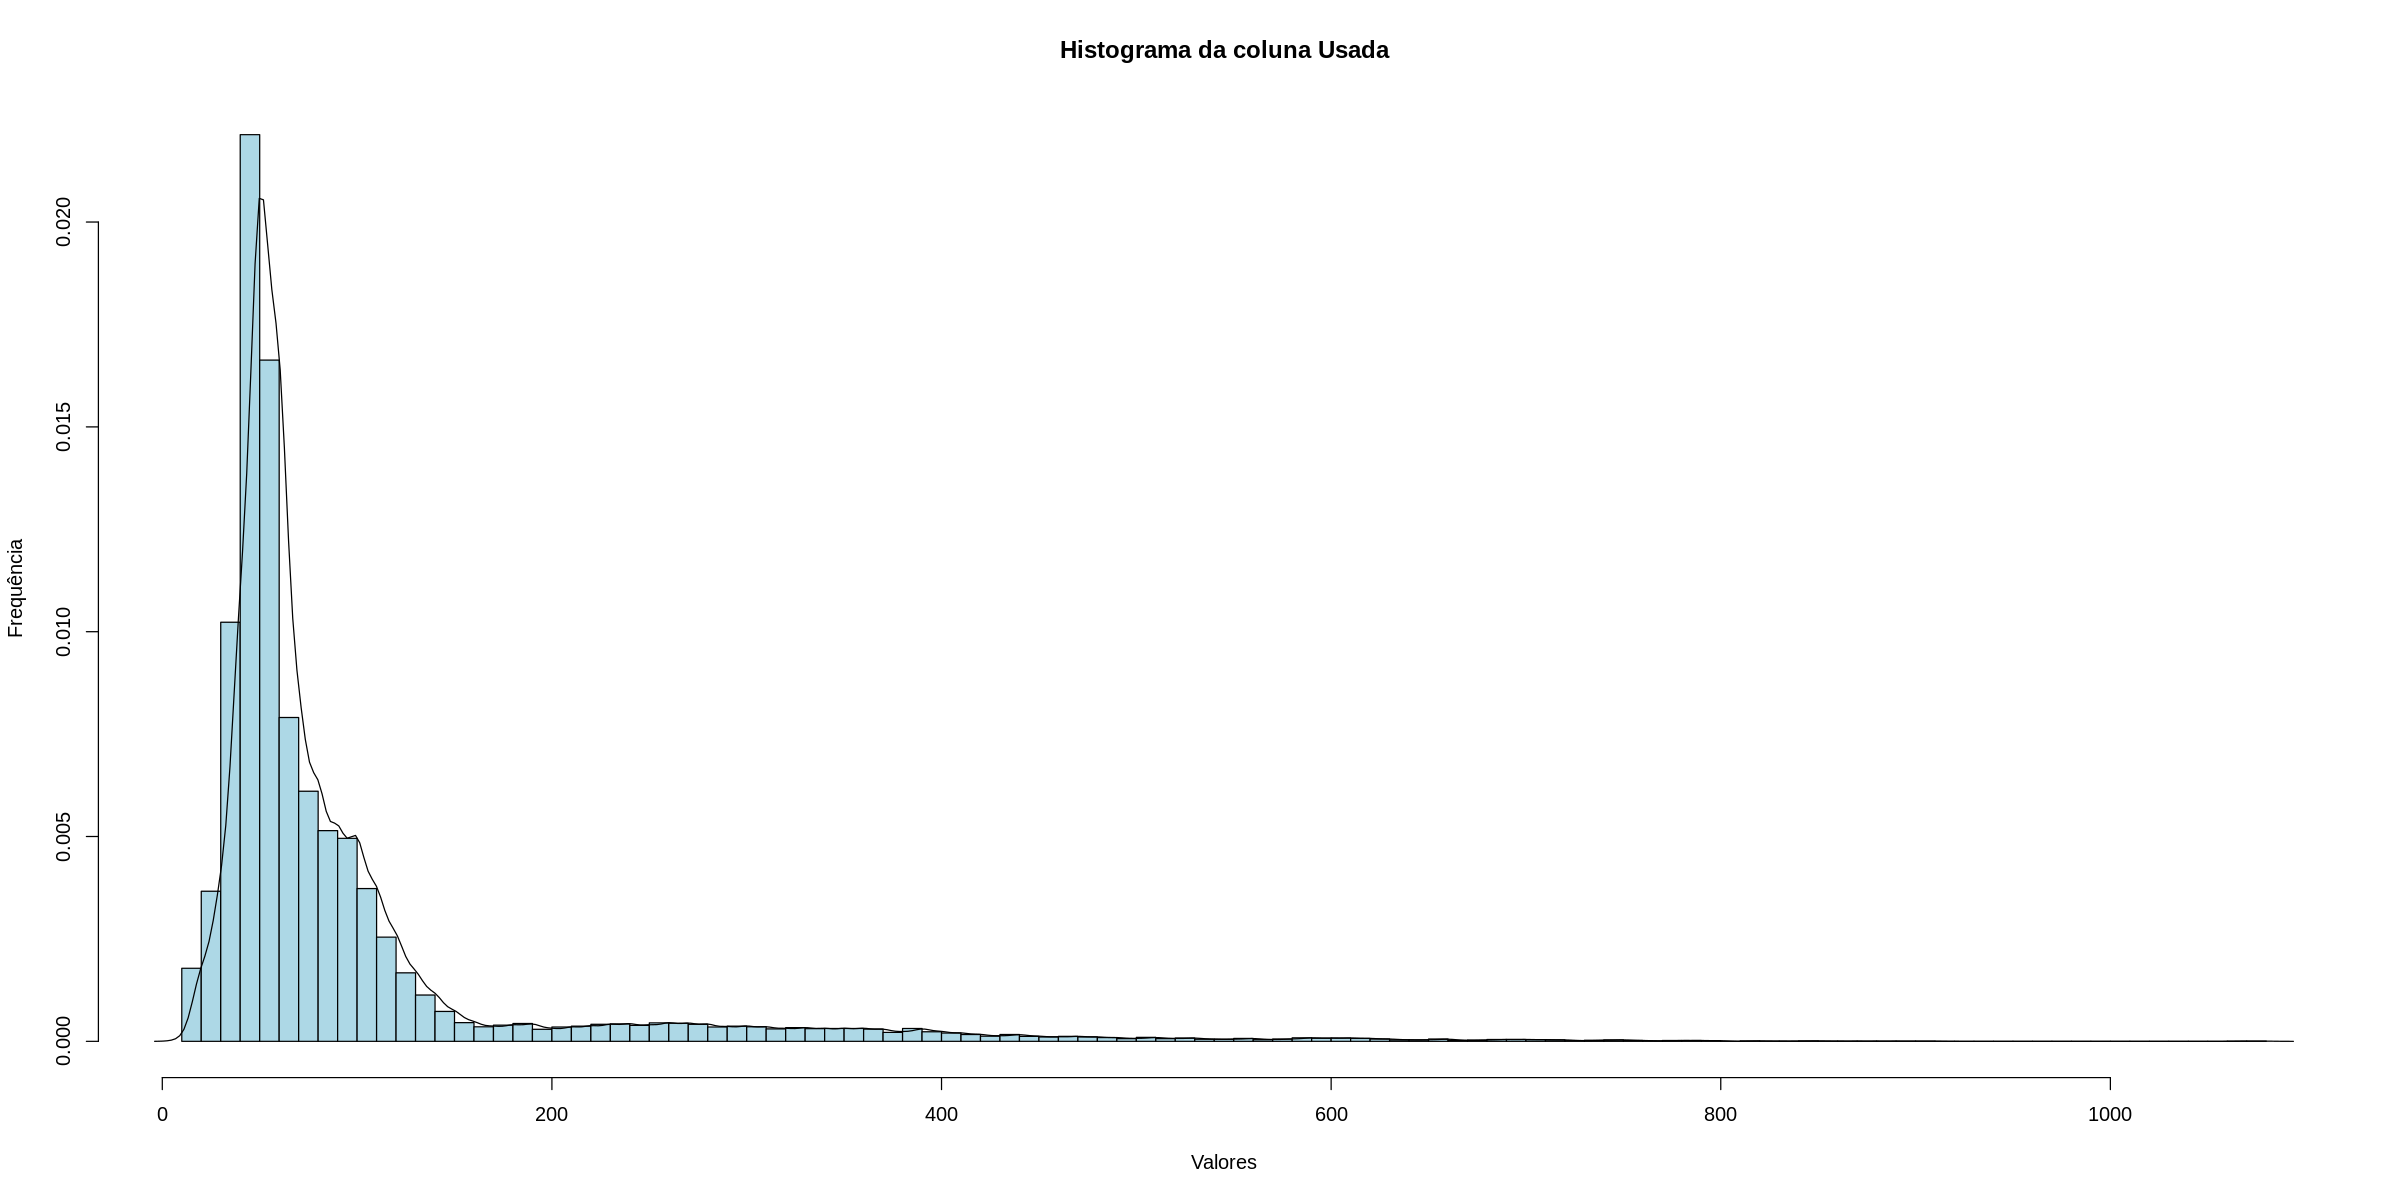

In [45]:
summary(dados$Usada)

hist(dados$Usada, main="Histograma da coluna Usada", xlab="Valores", ylab="Frequência", col="lightblue", breaks=100, probability=T)
lines(density(dados$Usada, col="red", lwd=2))

Verificando os dados presentes na coluna Usada

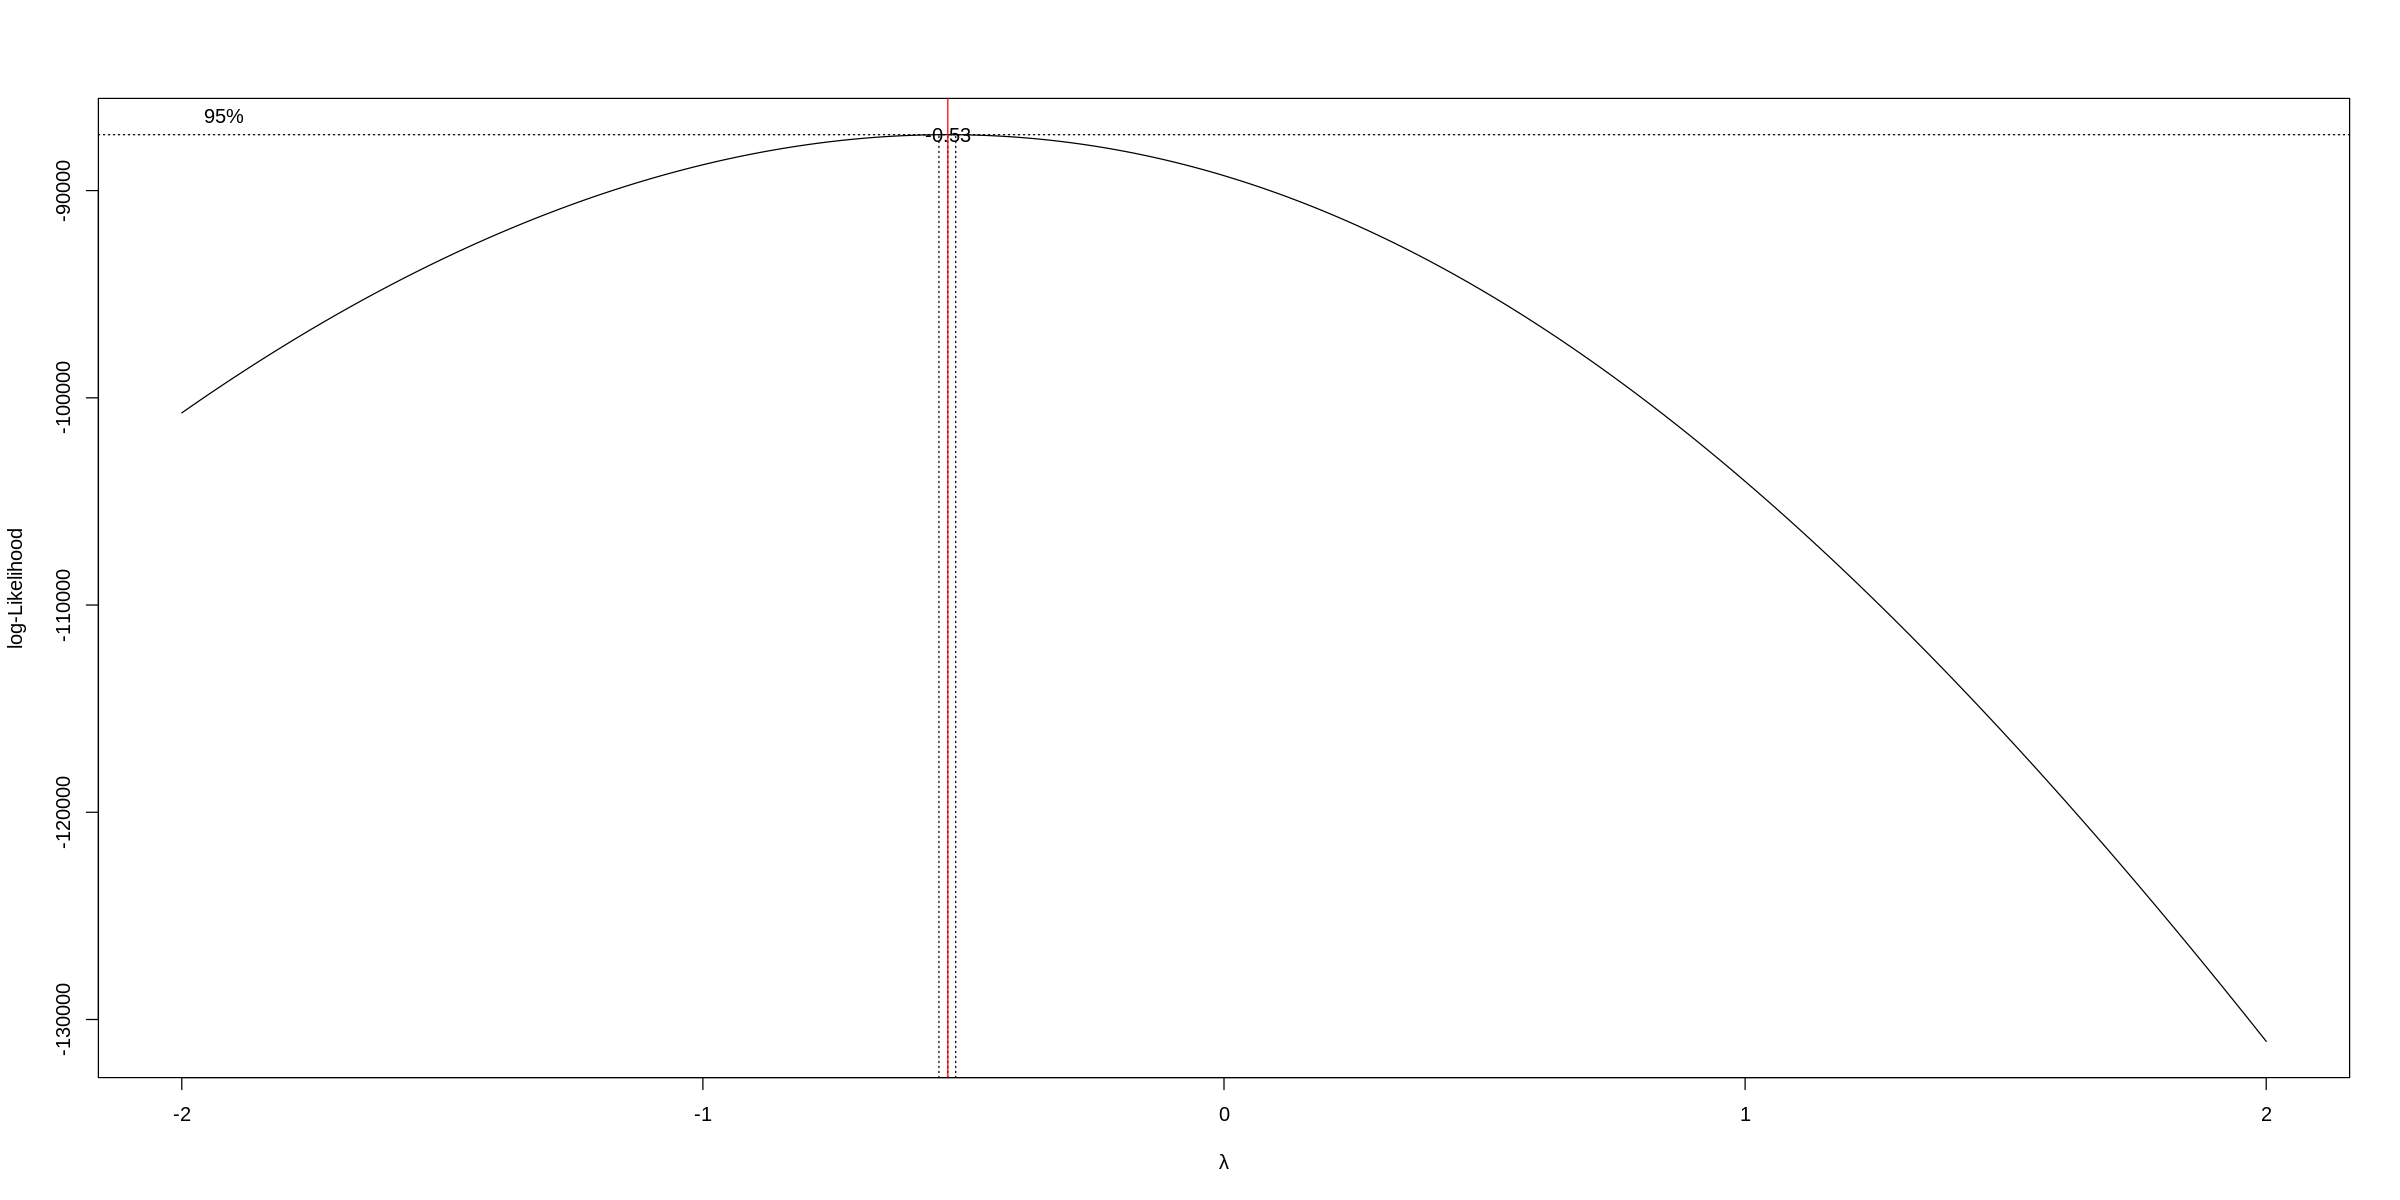

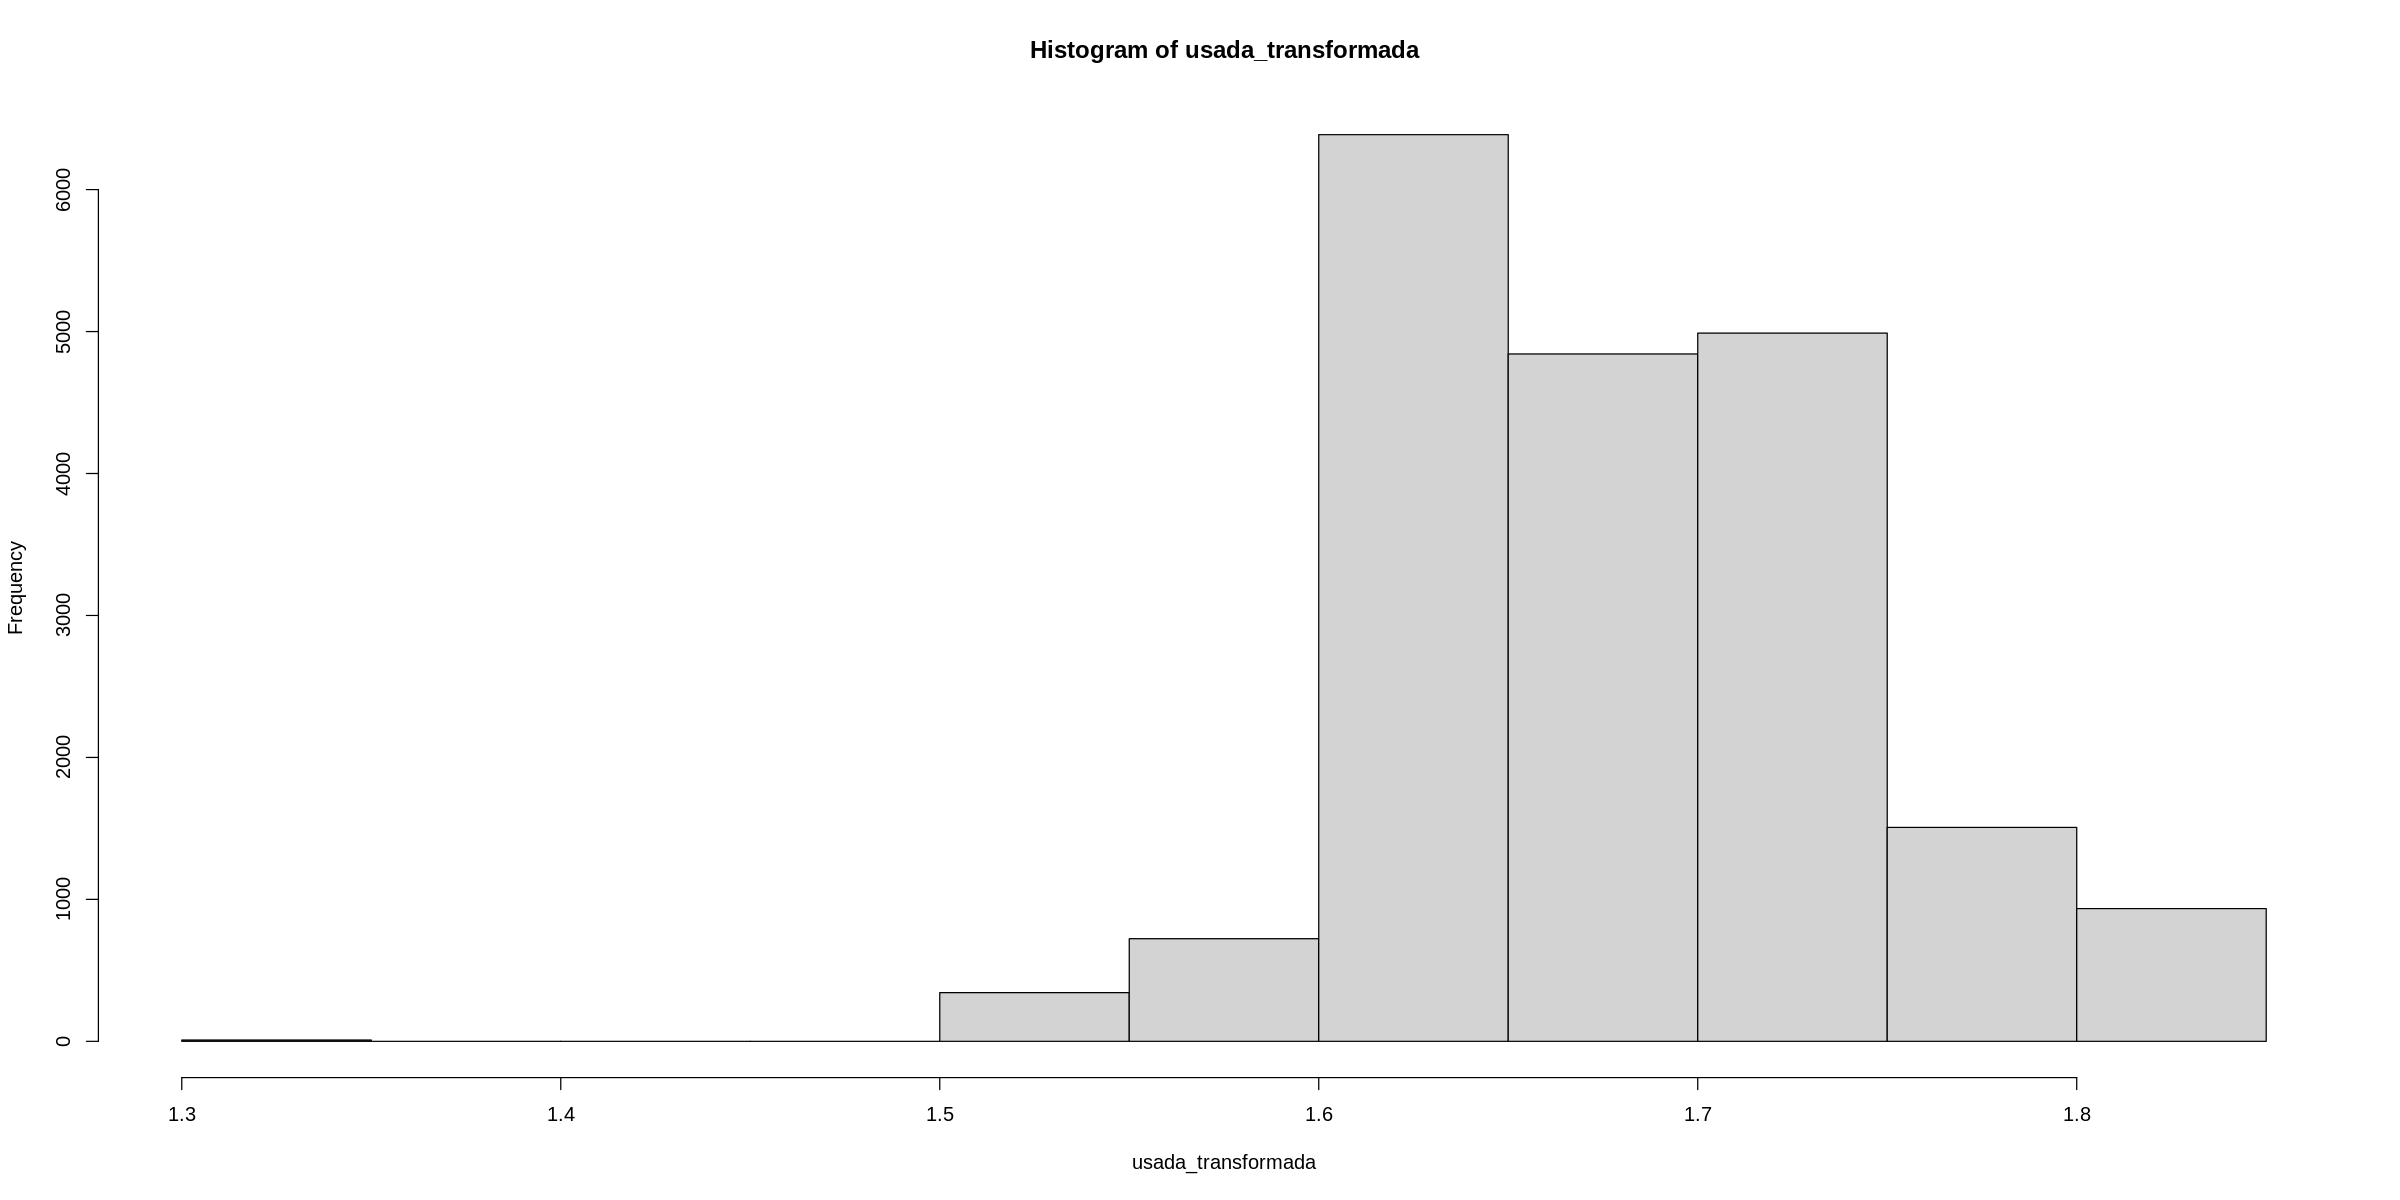

In [63]:
media = mean(dados$Usada)
desvio = sd(dados$Usada)

#Criando a variável que armazena os valores de dados$Usada e a variável que usa esses valores para a transformação de lambda
usada = dados$Usada
usada_boxcox = boxcox(usada ~ 1, lambda=seq(-2, 2, by=0.01))

#Identificando o melhor valor de lambda
melhor_lambda = usada_boxcox$x[which.max(usada_boxcox$y)]
abline(v= melhor_lambda, col="red", lwd=1)
text(melhor_lambda, max(usada_boxcox$y), labels=round(melhor_lambda, 2))

#Aplicando o valor da busca de melhor lambda e transformação dos dados
usada_transformada = (dados$Usada ** melhor_lambda - 1) / melhor_lambda

hist(usada_transformada)
#dados concentrados entre 1.5 e 1.8

Criando um novo data frame que será utilizado durante todo o processo

In [94]:
num_linhas = nrow(dados2)
num_col = ncol(dados2)
dados2 = data.frame(matrix(nrow=num_linhas, ncol=num_col))

[1] "\ndata:  usada_tratada\nA = 343.69, p-value < 2.2e-16\nOs dados não seguem uma distribuição normal ainda\n"

Warning message:
“In density.default(usada_tratada, col = "red", lwd = 2) :
 extra arguments ‘col’, ‘lwd’ will be disregarded”



	Anderson-Darling normality test

data:  usada_padronizada
A = 277.63, p-value < 2.2e-16


[1] "\ndata:  usada_padronizada\nA = 277.63, p-value < 2.2e-16\n"

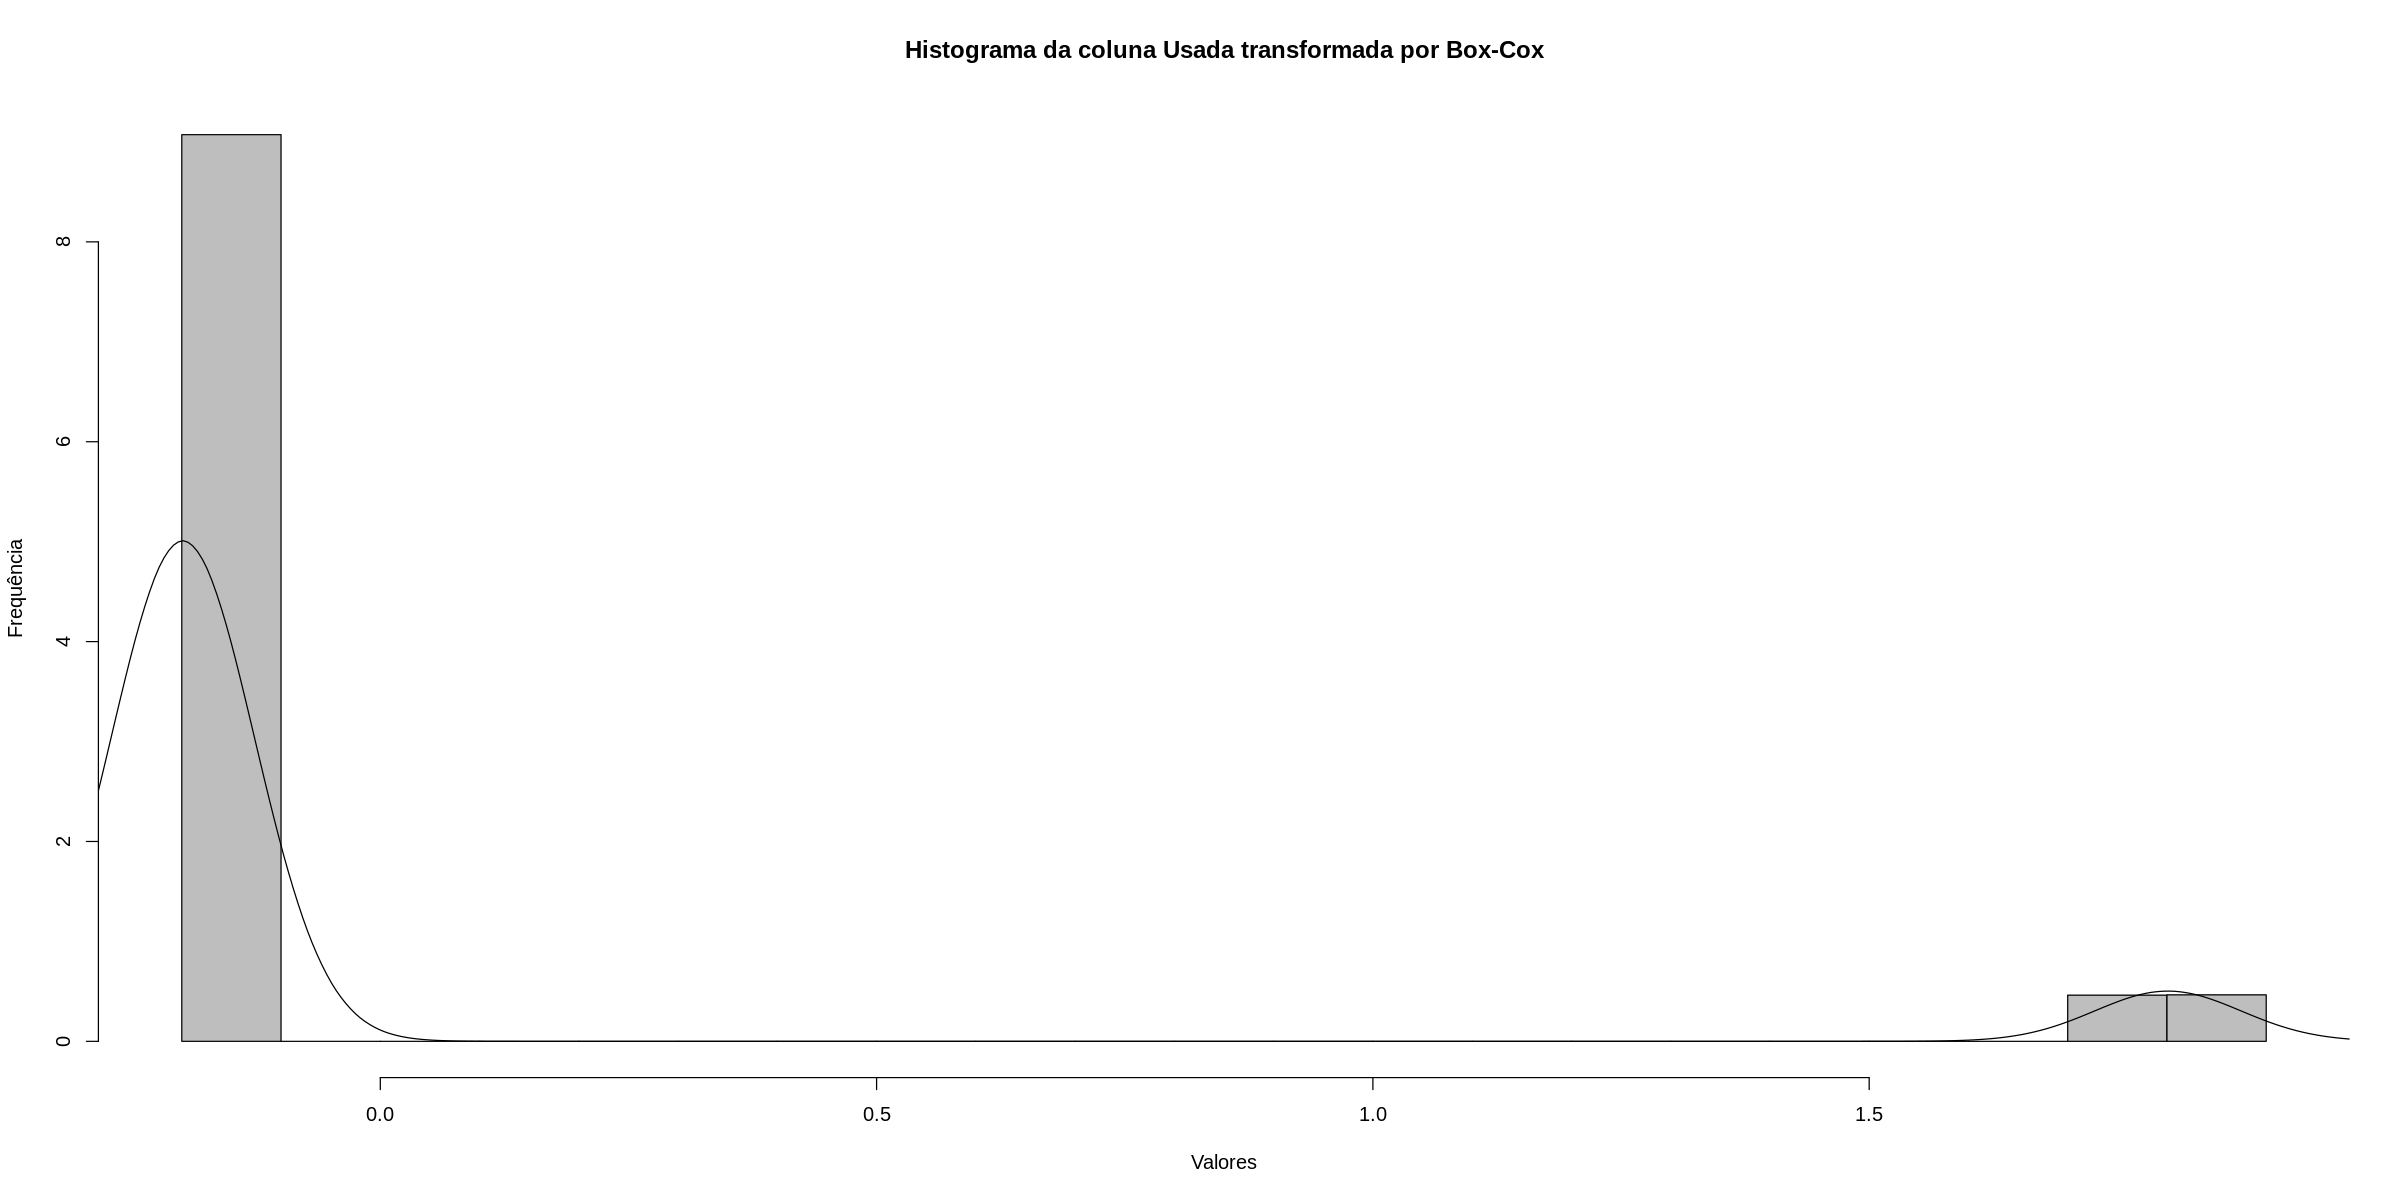

In [107]:
#Fazendo o teste de Anderson-Darling para checar se os dados estão normalmente distribuidos
#ad.test(usada_tratada)
"
data:  usada_tratada
A = 343.69, p-value < 2.2e-16
Os dados não seguem uma distribuição normal ainda
"

#Normalizando e padronizando os dados com z-score
usada_normalizada = (usada_transformada - min(usada_transformada)) / (max(usada_transformada) - min(usada_transformada))

#Padronização (Z-Score)
usada_padronizada = scale(usada_normalizada)

#Substituindo os valores de outliers pela mediana
usada_tratada = ifelse(usada_padronizada < limite_inferior_usada_transf | usada_transformada > limite_superior_usada_transf, mediana, usada_transformada)

#Calculando a mediana dos dados transformados da coluna Usada
mediana = median(usada_padronizada)

#Criando quartis 1 e quartis 3 para cálculo dos valores de outliers
limite_inferior_usada_padro = quantile(usada_padronizada, 0.25) - 1.5 * IQR(usada_padronizada)
limite_superior_usada_padro = quantile(usada_padronizada, 0.75) + 1.5 * IQR(usada_padronizada)

hist(usada_tratada, main="Histograma da coluna Usada transformada por Box-Cox", xlab="Valores", ylab="Frequência", col="gray", probability=T)
lines(density(usada_tratada, col="red", lwd=2))

ad.test(usada_padronizada)

"
data:  usada_padronizada
A = 277.63, p-value < 2.2e-16
"

In [111]:
#Adicionando os dados da variável usada_padronizada ao data frame dados2
dados2$Usada = usada_padronizada

#Observações dos estudos feitos até o momento:
1. Projeto de ciência de dados com tratamento de dados para predição de consumo de energia com 29 colunas que servirão de variáveis para o modelo.
2. Tratamento inicial pela coluna Usada, onde crio um novo data frame que após tratamento dos dados, tentativa de normalização dos dados adiciono os valores nas colunas específicas, preservando os valores originais.
3. Após algumas tentativas de normalização com box-cox, normalização e padronização dos dados não foi possível normalizar os dados da coluna Usada (que remete aos dados de energia consumida em Wh) pelas residências.
4. Aplicados testes de box-cox, normalização, padronização com z-score, onde o valor de p se mostrou significamente menor que 0.05, mostrando, dessa forma que os valores não são normalmente distribuidos.

Decidi trabalhar com um novo data frame com dados tratados preservando o data frame original, porque, caso, eu venha a cometer algum erro ou apagar algum dado sem querer, eu mantenho os dados originais preservados, dessa forma, apenas apagando variávies e rescrevendo-as.

5. Após os testes de normalização e padronização, os dados ficaram concentrados em torno de 0.58, o que indicou uma grande concentração nessa área e ao meu ver, os dados estão bons para serem tratados e usados em modelos de machine learning, séries temporais e redes neurais para futuras previsões de consumo de energia com base nas demais colunas.